In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [2]:
from ld_gan import visualize
import numpy as np
import ld_gan
import scipy.misc
from tqdm import tqdm
import ld_gan.utils.utils as ld
import ld_gan

# load data

In [3]:
path = "data/faceScrub/imgs_top_aligned/"
X, Y = ld_gan.data_proc.data_loader.load_data(path, resize=128, test_train="train")
Y = np.argmax(Y, axis = 1)

100%|██████████| 523/523 [03:05<00:00,  4.75it/s]

load data from 'data/faceScrub/imgs_top_aligned/'


In [4]:
path = "data/faceScrub/imgs_top_aligned/"
Xt, Yt = ld_gan.data_proc.data_loader.load_data(path, resize=128, test_train="test")
Yt = np.argmax(Yt, axis = 1)

100%|██████████| 523/523 [00:16<00:00, 28.77it/s]

load data from 'data/faceScrub/imgs_top_aligned/'


In [5]:
X_64 = np.array([scipy.misc.imresize(x, (64,64)) for x in tqdm(X)])
Xt_64 = np.array([scipy.misc.imresize(x, (64,64)) for x in tqdm(Xt)])

100%|██████████| 6906/6906 [00:02<00:00, 2429.60it/s]


# show

loaded model 'projects/XS_111v0.py/model/enc.pth'
loaded model 'projects/XS_111v0.py/model/gen.pth'
compute tsne...


<IPython.core.display.Javascript object>


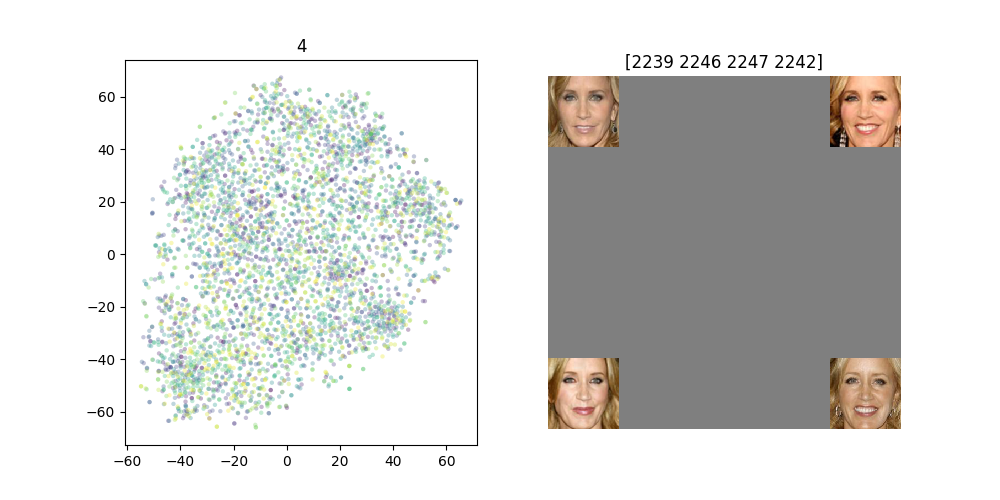

(6906,) (4000, 2)


In [8]:
# xs_111v1_gclf_scs_new
visualize.tsne_to_interpol_arr(Xt, Yt,  
                              "XS_111v0.py", 
                               10,
                               z_mapped = None,
                               n_neighbors = 4,
                               sampler=None,
                               alpha = 0.3,
                               n_pts_tsne = 4000,
                               real_img_mode = "all+mean",
                               small = False,
                               nn_within_class = True,
                               recompute_tsne = True
                              )

In [ ]:
3855, 3857, 3853, 3850
2986, 2983, 2976, 2974
2637, 2634, 2628, 2638
841, 838, 844, 840

In [5]:
#xs_111v0
#Xs_111v1_nnscs_trip_f5
#xs_111v0_trip

train_imgs, test_imgs = visualize.make_corner_imgs("XS_111v1_nnscs.py", 
                                                   None, 
                                                   128,
                                                   save = True)

loaded model 'projects/XS_111v1_nnscs.py/model/e_0000.pth'
loaded model 'projects/XS_111v1_nnscs.py/model/g_0000.pth'
loaded model 'projects/XS_111v1_nnscs.py/model/e_0010.pth'
loaded model 'projects/XS_111v1_nnscs.py/model/g_0010.pth'
loaded model 'projects/XS_111v1_nnscs.py/model/e_0020.pth'
loaded model 'projects/XS_111v1_nnscs.py/model/g_0020.pth'


TypeError: 'NoneType' object is not iterable

In [ ]:
ld.mk

In [46]:
os.listdir("projects/" + project + "/model/")

['gen.pth',
 'dis.pth',
 'enc.pth',
 'g_0000.pth',
 'd_0000.pth',
 'e_0000.pth',
 'g_0010.pth',
 'd_0010.pth',
 'e_0010.pth',
 'g_0020.pth',
 'd_0020.pth',
 'e_0020.pth',
 'g_0030.pth',
 'd_0030.pth',
 'e_0030.pth',
 'g_0040.pth',
 'd_0040.pth',
 'e_0040.pth',
 'g_0050.pth',
 'd_0050.pth',
 'e_0050.pth',
 'g_0060.pth',
 'd_0060.pth',
 'e_0060.pth']

In [57]:
models = os.listdir("projects/" + project + "/model/")
epochs = [int(m[2:-4]) for m in models if "d_" in m]

In [59]:
epochs

[0, 10, 20, 30, 40, 50, 60]

<IPython.core.display.Javascript object>


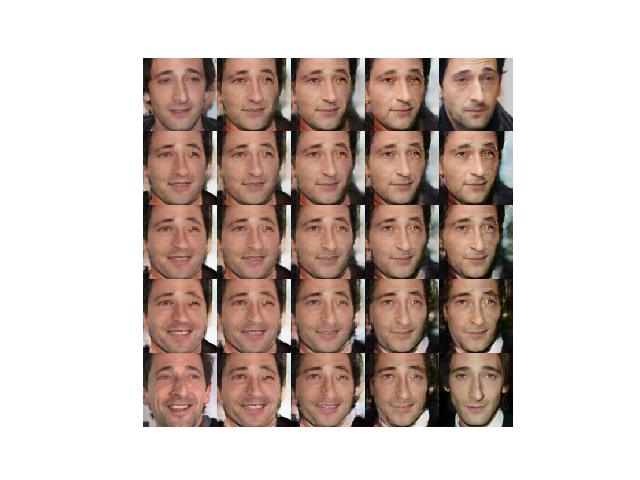

In [45]:
ld.disp(train_imgs[3])

In [ ]:
#TEST
idxs_test = [[983, 986, 974, 978]
             [601, 596, 594, 588]
             [313, 314, 315, 319]
             [59,  55,  52,  66]
             [29,  34,  30,  31]

In [26]:
#TRAIN
idxs_train = [[432, 351, 337, 448],
              [958, 911, 984, 910],
              [604, 597, 591, 592],
              [517, 484, 561, 498],
              [506, 539, 509, 523]]

In [34]:
resize = 128

In [16]:
fnames = sorted(ld.listdir("data/faceScrub/imgs_top_aligned/", ".jpg", True))
fnames_test = [fname for fname in fnames if "_test" in fname]
fnames_train = [fname for fname in fnames if "_test" not in fname]

In [29]:
fnames_test = np.array(fnames_test)
fnames_train = np.array(fnames_train)

In [22]:
project, epoch = "XS_111v1_gclf_scs_new.py", 20
enc = ld_gan.utils.model_handler.load_model(project, epoch, "enc")
gen = ld_gan.utils.model_handler.load_model(project, epoch, "gen")

cuda runtime error (10) : invalid device ordinal at torch/csrc/cuda/Module.cpp:87
found gpu mapping:  {'cuda:6': 'cuda:0'}
loaded model 'projects/XS_111v1_gclf_scs_new.py/model/e_0020.pth'
cuda runtime error (10) : invalid device ordinal at torch/csrc/cuda/Module.cpp:87
found gpu mapping:  {'cuda:6': 'cuda:0'}
loaded model 'projects/XS_111v1_gclf_scs_new.py/model/g_0020.pth'


<IPython.core.display.Javascript object>


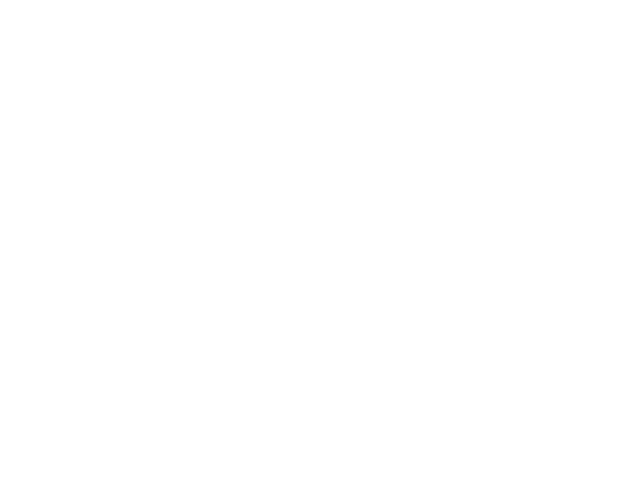

KeyboardInterrupt: 

In [36]:
c_imgs = []
for idxs in idxs_train:
    fnames = fnames_train[np.array(idxs)]
    imgs = [scipy.misc.imread(fname) for fname in fnames]
    imgs = np.array([scipy.misc.imresize(img, (resize,resize)) for img in imgs])
    c_img = visualize.make_corner_img(imgs, enc, gen)
    c_imgs.append(c_img)